In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spiderman2comment-data/spiderman2comment_data.csv


In [9]:
!pip install pandas nltk


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [17]:
# Membaca file CSV ke dalam DataFrame
file_path = '/kaggle/input/spiderman2comment-data/spiderman2comment_data.csv'
df = pd.read_csv(file_path)

In [18]:
df.head()

,Timestamp,Username,VideoID,Comment,Date
0,2024-07-13T01:24:41Z,@mason-do8rz,ZRhJT2nmvA4,he playstation if you do make spider man 3 can...,2024-07-13T01:24:41Z
1,2024-07-11T13:25:29Z,@Mastrovisma,ZRhJT2nmvA4,Sksdh ❤❤,2024-07-11T13:25:29Z
2,2024-07-11T10:39:23Z,@OlanKawan,ZRhJT2nmvA4,Wenn schon der Trailer so krass ist wie fühlt ...,2024-07-11T10:39:23Z
3,2024-07-09T10:49:35Z,@sixdaysontherun,ZRhJT2nmvA4,When is it coming out on pc? Lol,2024-07-09T10:49:35Z
4,2024-07-11T01:21:37Z,@comradegab3344,ZRhJT2nmvA4,Gonna be at least a year or two,2024-07-11T01:21:37Z


In [19]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Unduh stopwords jika belum diunduh
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
def clean_text(text):
    if isinstance(text, str):
        # Ubah teks menjadi huruf kecil
        text = text.lower()
        
        # Hapus teks dalam tanda kurung siku, tanda baca, dan angka
        text = re.sub('\[.*?\]', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\w*\d\w*', '', text)
        
        # Hapus emotikon
        text = re.sub(r'[^\x00-\x7F]+', '', text)
        
        # Hapus stop words
        stop_words = set(stopwords.words('english'))
        text = ' '.join(word for word in text.split() if word not in stop_words)
        
        # Hapus spasi berlebih
        text = re.sub('\s+', ' ', text).strip()
        
        return text
    else:
        return ''


In [23]:
# Terapkan fungsi pembersihan teks ke kolom 'Comment'
df['Cleaned_Comment'] = df['Comment'].apply(clean_text)

# Hapus baris yang kosong atau hanya berisi spasi
df['Cleaned_Comment'].replace('', pd.NA, inplace=True)
df.dropna(subset=['Cleaned_Comment'], inplace=True)

# Tampilkan beberapa baris pertama dari dataset yang sudah dibersihkan
print(df[['Comment', 'Cleaned_Comment']].head())


                                             Comment  \
0  he playstation if you do make spider man 3 can...   
1                                           Sksdh ❤❤   
2  Wenn schon der Trailer so krass ist wie fühlt ...   
3                   When is it coming out on pc? Lol   
4                    Gonna be at least a year or two   

                                     Cleaned_Comment  
0  playstation make spider man guys put venom kic...  
1                                              sksdh  
2  wenn schon der trailer krass ist wie fhlt sich...  
3                                      coming pc lol  
4                               gonna least year two  


/tmp/ipykernel_145/1530491223.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cleaned_Comment'].replace('', pd.NA, inplace=True)


In [ ]:
df.head(20)

TOKENISASI

In [25]:
# Impor library yang diperlukan
from nltk.tokenize import word_tokenize

# Definisikan fungsi untuk tokenisasi
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens


In [26]:
# Terapkan fungsi tokenisasi ke kolom 'Cleaned_Comment'
df['Tokenized_Comment'] = df['Cleaned_Comment'].apply(tokenize_text)

# Tampilkan beberapa baris pertama dari dataset dengan kolom tokenisasi
print(df[['Cleaned_Comment', 'Tokenized_Comment']].head())

                                     Cleaned_Comment  \
0  playstation make spider man guys put venom kic...   
1                                              sksdh   
2  wenn schon der trailer krass ist wie fhlt sich...   
3                                      coming pc lol   
4                               gonna least year two   

                                   Tokenized_Comment  
0  [playstation, make, spider, man, guys, put, ve...  
1                                            [sksdh]  
2  [wenn, schon, der, trailer, krass, ist, wie, f...  
3                                  [coming, pc, lol]  
4                        [gon, na, least, year, two]  


In [ ]:
df.tail(20)

In [ ]:
!pip install -U spacy


In [ ]:
!python -m spacy download en_core_web_sm


In [27]:
import spacy
from spacy.lang.en import English
import pandas as pd

# Load model bahasa Inggris
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Fungsi untuk lemmatisasi teks menggunakan spacy
def lemmatize_text_spacy(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

In [28]:
# Terapkan lemmatisasi ke kolom 'Tokenized_Comment'
df['Lemmatized_Comment'] = df['Tokenized_Comment'].apply(lambda x: lemmatize_text_spacy(" ".join(x)))

# Tampilkan beberapa baris pertama dari dataset dengan kolom lemmatisasi
print(df[['Tokenized_Comment', 'Lemmatized_Comment']].head())

                                   Tokenized_Comment  \
0  [playstation, make, spider, man, guys, put, ve...   
1                                            [sksdh]   
2  [wenn, schon, der, trailer, krass, ist, wie, f...   
3                                  [coming, pc, lol]   
4                        [gon, na, least, year, two]   

                                  Lemmatized_Comment  
0  [playstation, make, spider, man, guy, put, ven...  
1                                            [sksdh]  
2  [wenn, schon, der, trailer, krass, ist, wie, f...  
3                                    [come, pc, lol]  
4                         [go, to, least, year, two]  


In [29]:
df.tail(20)

,Timestamp,Username,VideoID,Comment,Date,Cleaned_Comment,Tokenized_Comment,Lemmatized_Comment
12977,2023-05-25T06:16:38Z,@mariuspamfile9058,ZRhJT2nmvA4,Props to PLAYSTATION team for almost Always pr...,2023-05-25T06:16:38Z,props playstation team almost always propose e...,"[props, playstation, team, almost, always, pro...","[prop, playstation, team, almost, always, prop..."
12978,2023-05-25T06:16:09Z,@JDVSION,ZRhJT2nmvA4,Prototype X Spiderman,2023-05-25T06:16:09Z,prototype x spiderman,"[prototype, x, spiderman]","[prototype, x, spiderman]"
12979,2023-05-25T06:15:46Z,@thebatwaynevlogs5433,ZRhJT2nmvA4,Wow just wow,2023-05-25T06:15:46Z,wow wow,"[wow, wow]","[wow, wow]"
12980,2023-05-25T06:15:45Z,@KickUpHammyDude,ZRhJT2nmvA4,FREAKIN FINALLY!!!,2023-05-25T06:15:45Z,freakin finally,"[freakin, finally]","[freakin, finally]"
12982,2023-05-25T06:15:31Z,@MrDavidPartida,ZRhJT2nmvA4,Yoooooooooooooooooo!!!!!!!!!!\nThis game looks...,2023-05-25T06:15:31Z,yoooooooooooooooooo game looks amazing job wel...,"[yoooooooooooooooooo, game, looks, amazing, jo...","[yoooooooooooooooooo, game, look, amazing, job..."
12983,2023-05-25T06:15:25Z,@ShadowFlame500,ZRhJT2nmvA4,Always loved the Venom-Man. The aggressive bru...,2023-05-25T06:15:25Z,always loved venomman aggressive brutality clo...,"[always, loved, venomman, aggressive, brutalit...","[always, love, venomman, aggressive, brutality..."
12984,2023-05-25T06:15:22Z,@ouskalamiif78abcd38,ZRhJT2nmvA4,Whatt (im french),2023-05-25T06:15:22Z,whatt im french,"[whatt, im, french]","[whatt, I, m, french]"
12985,2023-05-25T06:15:19Z,@sunsetatj603,ZRhJT2nmvA4,Yep they bagged me,2023-05-25T06:15:19Z,yep bagged,"[yep, bagged]","[yep, bag]"
12986,2023-05-25T06:15:18Z,@Aadamshahzad74,ZRhJT2nmvA4,This game has got anything I wanted,2023-05-25T06:15:18Z,game got anything wanted,"[game, got, anything, wanted]","[game, get, anything, want]"
12987,2023-05-25T06:15:05Z,@navdeepsingh3508,ZRhJT2nmvA4,Omae wa mo....,2023-05-25T06:15:05Z,omae wa mo,"[omae, wa, mo]","[omae, wa, mo]"


In [31]:
# Buat kolom 'teks_akhir' dari 'Lemmatized_Comment'
df['teks_akhir'] = df['Lemmatized_Comment'].apply(lambda x: ' '.join(x))

In [32]:
df.head(20)

,Timestamp,Username,VideoID,Comment,Date,Cleaned_Comment,Tokenized_Comment,Lemmatized_Comment,teks_akhir
0,2024-07-13T01:24:41Z,@mason-do8rz,ZRhJT2nmvA4,he playstation if you do make spider man 3 can...,2024-07-13T01:24:41Z,playstation make spider man guys put venom kic...,"[playstation, make, spider, man, guys, put, ve...","[playstation, make, spider, man, guy, put, ven...",playstation make spider man guy put venom kick...
1,2024-07-11T13:25:29Z,@Mastrovisma,ZRhJT2nmvA4,Sksdh ❤❤,2024-07-11T13:25:29Z,sksdh,[sksdh],[sksdh],sksdh
2,2024-07-11T10:39:23Z,@OlanKawan,ZRhJT2nmvA4,Wenn schon der Trailer so krass ist wie fühlt ...,2024-07-11T10:39:23Z,wenn schon der trailer krass ist wie fhlt sich...,"[wenn, schon, der, trailer, krass, ist, wie, f...","[wenn, schon, der, trailer, krass, ist, wie, f...",wenn schon der trailer krass ist wie fhlt sich...
3,2024-07-09T10:49:35Z,@sixdaysontherun,ZRhJT2nmvA4,When is it coming out on pc? Lol,2024-07-09T10:49:35Z,coming pc lol,"[coming, pc, lol]","[come, pc, lol]",come pc lol
4,2024-07-11T01:21:37Z,@comradegab3344,ZRhJT2nmvA4,Gonna be at least a year or two,2024-07-11T01:21:37Z,gonna least year two,"[gon, na, least, year, two]","[go, to, least, year, two]",go to least year two
5,2024-07-03T15:46:00Z,@AA-ol5vu,ZRhJT2nmvA4,1:32 Chun li be takin notes 💀,2024-07-03T15:46:00Z,chun li takin notes,"[chun, li, takin, notes]","[chun, li, takin, note]",chun li takin note
6,2024-07-03T06:33:43Z,@tino9117,ZRhJT2nmvA4,*HE'S GONNA WISH HE NEVER CAME TO NEW YORK*,2024-07-03T06:33:43Z,hes gonna wish never came new york,"[hes, gon, na, wish, never, came, new, york]","[he, s, go, to, wish, never, come, new, york]",he s go to wish never come new york
7,2024-07-01T03:59:30Z,@therealoneandonlyspider-ma1350,ZRhJT2nmvA4,You cant even sling them and smash them in wal...,2024-07-01T03:59:30Z,cant even sling smash walls like video shows s...,"[cant, even, sling, smash, walls, like, video,...","[can, not, even, sle, smash, wall, like, video...",can not even sle smash wall like video show sw...
8,2024-07-03T13:41:58Z,@alexnewtron3579,ZRhJT2nmvA4,"Um, no? You can do that",2024-07-03T13:41:58Z,um,[um],[um],um
9,2024-07-05T20:25:26Z,@Ashattack135,ZRhJT2nmvA4,Yes you can…,2024-07-05T20:25:26Z,yes,[yes],[yes],yes


Labeling

In [33]:
from textblob import TextBlob

# Fungsi untuk mendapatkan label sentimen menggunakan TextBlob
def get_sentiment_label(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    
    if polarity > 0:
        return 'positif'
    elif polarity < 0:
        return 'negatif'
    else:
        return 'netral'

In [34]:
# Terapkan fungsi untuk mendapatkan label sentimen ke kolom 'teks_akhir'
df['Sentiment_Label'] = df['teks_akhir'].apply(get_sentiment_label)

In [35]:
df.head(20)

,Timestamp,Username,VideoID,Comment,Date,Cleaned_Comment,Tokenized_Comment,Lemmatized_Comment,teks_akhir,Sentiment_Label
0,2024-07-13T01:24:41Z,@mason-do8rz,ZRhJT2nmvA4,he playstation if you do make spider man 3 can...,2024-07-13T01:24:41Z,playstation make spider man guys put venom kic...,"[playstation, make, spider, man, guys, put, ve...","[playstation, make, spider, man, guy, put, ven...",playstation make spider man guy put venom kick...,netral
1,2024-07-11T13:25:29Z,@Mastrovisma,ZRhJT2nmvA4,Sksdh ❤❤,2024-07-11T13:25:29Z,sksdh,[sksdh],[sksdh],sksdh,netral
2,2024-07-11T10:39:23Z,@OlanKawan,ZRhJT2nmvA4,Wenn schon der Trailer so krass ist wie fühlt ...,2024-07-11T10:39:23Z,wenn schon der trailer krass ist wie fhlt sich...,"[wenn, schon, der, trailer, krass, ist, wie, f...","[wenn, schon, der, trailer, krass, ist, wie, f...",wenn schon der trailer krass ist wie fhlt sich...,netral
3,2024-07-09T10:49:35Z,@sixdaysontherun,ZRhJT2nmvA4,When is it coming out on pc? Lol,2024-07-09T10:49:35Z,coming pc lol,"[coming, pc, lol]","[come, pc, lol]",come pc lol,positif
4,2024-07-11T01:21:37Z,@comradegab3344,ZRhJT2nmvA4,Gonna be at least a year or two,2024-07-11T01:21:37Z,gonna least year two,"[gon, na, least, year, two]","[go, to, least, year, two]",go to least year two,negatif
5,2024-07-03T15:46:00Z,@AA-ol5vu,ZRhJT2nmvA4,1:32 Chun li be takin notes 💀,2024-07-03T15:46:00Z,chun li takin notes,"[chun, li, takin, notes]","[chun, li, takin, note]",chun li takin note,netral
6,2024-07-03T06:33:43Z,@tino9117,ZRhJT2nmvA4,*HE'S GONNA WISH HE NEVER CAME TO NEW YORK*,2024-07-03T06:33:43Z,hes gonna wish never came new york,"[hes, gon, na, wish, never, came, new, york]","[he, s, go, to, wish, never, come, new, york]",he s go to wish never come new york,positif
7,2024-07-01T03:59:30Z,@therealoneandonlyspider-ma1350,ZRhJT2nmvA4,You cant even sling them and smash them in wal...,2024-07-01T03:59:30Z,cant even sling smash walls like video shows s...,"[cant, even, sling, smash, walls, like, video,...","[can, not, even, sle, smash, wall, like, video...",can not even sle smash wall like video show sw...,netral
8,2024-07-03T13:41:58Z,@alexnewtron3579,ZRhJT2nmvA4,"Um, no? You can do that",2024-07-03T13:41:58Z,um,[um],[um],um,netral
9,2024-07-05T20:25:26Z,@Ashattack135,ZRhJT2nmvA4,Yes you can…,2024-07-05T20:25:26Z,yes,[yes],[yes],yes,netral


In [36]:
df.tail(20)

,Timestamp,Username,VideoID,Comment,Date,Cleaned_Comment,Tokenized_Comment,Lemmatized_Comment,teks_akhir,Sentiment_Label
12977,2023-05-25T06:16:38Z,@mariuspamfile9058,ZRhJT2nmvA4,Props to PLAYSTATION team for almost Always pr...,2023-05-25T06:16:38Z,props playstation team almost always propose e...,"[props, playstation, team, almost, always, pro...","[prop, playstation, team, almost, always, prop...",prop playstation team almost always propose ex...,netral
12978,2023-05-25T06:16:09Z,@JDVSION,ZRhJT2nmvA4,Prototype X Spiderman,2023-05-25T06:16:09Z,prototype x spiderman,"[prototype, x, spiderman]","[prototype, x, spiderman]",prototype x spiderman,netral
12979,2023-05-25T06:15:46Z,@thebatwaynevlogs5433,ZRhJT2nmvA4,Wow just wow,2023-05-25T06:15:46Z,wow wow,"[wow, wow]","[wow, wow]",wow wow,positif
12980,2023-05-25T06:15:45Z,@KickUpHammyDude,ZRhJT2nmvA4,FREAKIN FINALLY!!!,2023-05-25T06:15:45Z,freakin finally,"[freakin, finally]","[freakin, finally]",freakin finally,netral
12982,2023-05-25T06:15:31Z,@MrDavidPartida,ZRhJT2nmvA4,Yoooooooooooooooooo!!!!!!!!!!\nThis game looks...,2023-05-25T06:15:31Z,yoooooooooooooooooo game looks amazing job wel...,"[yoooooooooooooooooo, game, looks, amazing, jo...","[yoooooooooooooooooo, game, look, amazing, job...",yoooooooooooooooooo game look amazing job well do,positif
12983,2023-05-25T06:15:25Z,@ShadowFlame500,ZRhJT2nmvA4,Always loved the Venom-Man. The aggressive bru...,2023-05-25T06:15:25Z,always loved venomman aggressive brutality clo...,"[always, loved, venomman, aggressive, brutalit...","[always, love, venomman, aggressive, brutality...",always love venomman aggressive brutality clos...,positif
12984,2023-05-25T06:15:22Z,@ouskalamiif78abcd38,ZRhJT2nmvA4,Whatt (im french),2023-05-25T06:15:22Z,whatt im french,"[whatt, im, french]","[whatt, I, m, french]",whatt I m french,netral
12985,2023-05-25T06:15:19Z,@sunsetatj603,ZRhJT2nmvA4,Yep they bagged me,2023-05-25T06:15:19Z,yep bagged,"[yep, bagged]","[yep, bag]",yep bag,netral
12986,2023-05-25T06:15:18Z,@Aadamshahzad74,ZRhJT2nmvA4,This game has got anything I wanted,2023-05-25T06:15:18Z,game got anything wanted,"[game, got, anything, wanted]","[game, get, anything, want]",game get anything want,negatif
12987,2023-05-25T06:15:05Z,@navdeepsingh3508,ZRhJT2nmvA4,Omae wa mo....,2023-05-25T06:15:05Z,omae wa mo,"[omae, wa, mo]","[omae, wa, mo]",omae wa mo,netral


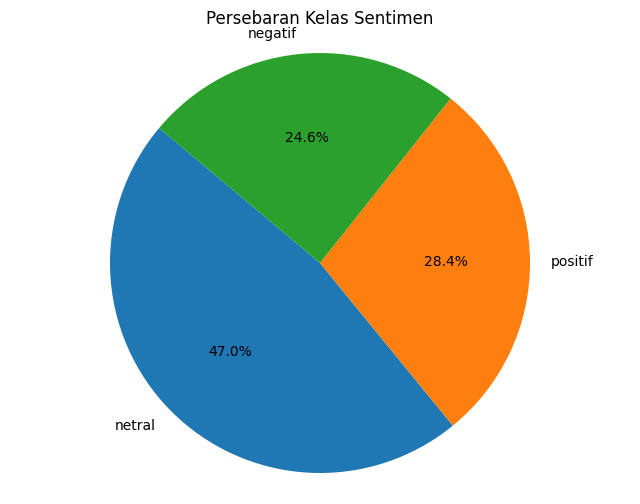

In [37]:
import matplotlib.pyplot as plt

# Hitung frekuensi masing-masing kelas sentimen
sentiment_counts = df['Sentiment_Label'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persebaran Kelas Sentimen')
plt.axis('equal')  # Memastikan lingkaran berbentuk lingkaran
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ambil teks dari kolom teks_akhir
texts = df['teks_akhir'].tolist()

# Gabungkan semua teks menjadi satu string
text_combined = ' '.join(texts)

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text_combined)

# Tampilkan WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Ekstraksi Fitur

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# Ambil teks dari kolom teks_akhir
texts = df['teks_akhir'].tolist()

# Inisialisasi CountVectorizer
vectorizer = CountVectorizer()

# Fit dan transform data teks
X = vectorizer.fit_transform(texts)

# Mendapatkan fitur kata yang dihasilkan
feature_names = vectorizer.get_feature_names_out()

# Tampilkan hasil
print("Bag of Words:")
print(feature_names)
print("BoW Matrix:")
print(X.toarray())


Bag of Words:
['aa' 'aaa' 'aaaaaa' ... 'zxwerto' 'zzzzzzz' 'zzzzzzzzzzzzzzz']
BoW Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ambil teks dari kolom teks_akhir
texts = df['teks_akhir'].tolist()

# Inisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit dan transform data teks
X = vectorizer.fit_transform(texts)

# Mendapatkan fitur kata yang dihasilkan
feature_names = vectorizer.get_feature_names_out()

# Tampilkan hasil
print("TF-IDF Matrix:")
print(X.toarray())
print("Feature Names:")
print(feature_names)


TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Feature Names:
['aa' 'aaa' 'aaaaaa' ... 'zxwerto' 'zzzzzzz' 'zzzzzzzzzzzzzzz']


In [51]:
df.head()

,Timestamp,Username,VideoID,Comment,Date,Cleaned_Comment,Tokenized_Comment,Lemmatized_Comment,teks_akhir,Sentiment_Label
0,2024-07-13T01:24:41Z,@mason-do8rz,ZRhJT2nmvA4,he playstation if you do make spider man 3 can...,2024-07-13T01:24:41Z,playstation make spider man guys put venom kic...,"[playstation, make, spider, man, guys, put, ve...","[playstation, make, spider, man, guy, put, ven...",playstation make spider man guy put venom kick...,netral
1,2024-07-11T13:25:29Z,@Mastrovisma,ZRhJT2nmvA4,Sksdh ❤❤,2024-07-11T13:25:29Z,sksdh,[sksdh],[sksdh],sksdh,netral
2,2024-07-11T10:39:23Z,@OlanKawan,ZRhJT2nmvA4,Wenn schon der Trailer so krass ist wie fühlt ...,2024-07-11T10:39:23Z,wenn schon der trailer krass ist wie fhlt sich...,"[wenn, schon, der, trailer, krass, ist, wie, f...","[wenn, schon, der, trailer, krass, ist, wie, f...",wenn schon der trailer krass ist wie fhlt sich...,netral
3,2024-07-09T10:49:35Z,@sixdaysontherun,ZRhJT2nmvA4,When is it coming out on pc? Lol,2024-07-09T10:49:35Z,coming pc lol,"[coming, pc, lol]","[come, pc, lol]",come pc lol,positif
4,2024-07-11T01:21:37Z,@comradegab3344,ZRhJT2nmvA4,Gonna be at least a year or two,2024-07-11T01:21:37Z,gonna least year two,"[gon, na, least, year, two]","[go, to, least, year, two]",go to least year two,negatif


Membuat Model

**Model Pertama: CNN + TF-IDF**

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Ambil teks dari kolom teks_akhir
texts = df['teks_akhir'].tolist()

# Inisialisasi TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Inisialisasi data X (TF-IDF) dan y (Sentiment_Label)
X = X.toarray()  # Convert sparse matrix to numpy array

# Encode label menggunakan LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment_Label'])

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Sequential
model = Sequential([
    Dense(128, input_dim=X.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer dengan jumlah kelas yang sesuai
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6061 - loss: 0.8361 - val_accuracy: 0.8889 - val_loss: 0.3274
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9566 - loss: 0.1353 - val_accuracy: 0.8902 - val_loss: 0.3266
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9886 - loss: 0.0492 - val_accuracy: 0.9054 - val_loss: 0.3095
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9945 - loss: 0.0230 - val_accuracy: 0.9079 - val_loss: 0.3488
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9973 - loss: 0.0119 - val_accuracy: 0.9046 - val_loss: 0.3839
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9986 - loss: 0.0063 - val_accuracy: 0.9058 - val_loss: 0.4029
Epoch 7/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9995 - loss: 0.0039 - val_accuracy: 0.9050 - val_loss: 0.4255
Epoch 8/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 0.0013 - val_accuracy: 0

**Model Kedua: CNN + Bag-of-Words (BoW)**

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Ambil teks dari kolom teks_akhir
texts = df['teks_akhir'].tolist()

# Inisialisasi CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Inisialisasi data X (BoW) dan y (Sentiment_Label)
X = X.toarray()  # Convert sparse matrix to numpy array

# Encode label menggunakan LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment_Label'])

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Sequential
model = Sequential([
    Dense(128, input_dim=X.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer dengan jumlah kelas yang sesuai
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(X_train, y_train, epochs=11, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/11
 72/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5440 - loss: 1.0303

I0000 00:00:1720870814.205437     196 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


304/304 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6942 - loss: 0.7643 - val_accuracy: 0.9021 - val_loss: 0.3429
Epoch 2/11
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9629 - loss: 0.1319 - val_accuracy: 0.9062 - val_loss: 0.3193
Epoch 3/11
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9859 - loss: 0.0512 - val_accuracy: 0.9198 - val_loss: 0.3157
Epoch 4/11
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9965 - loss: 0.0153 - val_accuracy: 0.9251 - val_loss: 0.3180
Epoch 5/11
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9990 - loss: 0.0069 - val_accuracy: 0.9202 - val_loss: 0.3712
Epoch 6/11
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9983 - loss: 0.0080 - val_accuracy: 0.9243 - val_loss: 0.3840
Epoch 7/11
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9243 - val_loss: 0.3997
Epoch 8/11
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 8.8174e-04 - val_accuracy: 0.9231 -

Model Ketiga: LSTM + Embedding

In [43]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Ambil teks dari kolom Lemmatized_Comment atau teks_akhir
texts = df['Lemmatized_Comment'].tolist()  # atau df['teks_akhir']

# Inisialisasi Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# Sequencing data teks
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences agar memiliki panjang yang sama
max_sequence_length = max([len(seq) for seq in sequences])
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Encode label menggunakan LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment_Label'])

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Sequential
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_sequence_length),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer dengan jumlah kelas yang sesuai
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(X_train, y_train, epochs=11, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/11
304/304 ━━━━━━━━━━━━━━━━━━━━ 182s 580ms/step - accuracy: 0.6253 - loss: 0.8289 - val_accuracy: 0.8893 - val_loss: 0.3309
Epoch 2/11
304/304 ━━━━━━━━━━━━━━━━━━━━ 176s 580ms/step - accuracy: 0.9226 - loss: 0.2227 - val_accuracy: 0.9255 - val_loss: 0.2563
Epoch 3/11
304/304 ━━━━━━━━━━━━━━━━━━━━ 176s 579ms/step - accuracy: 0.9720 - loss: 0.0986 - val_accuracy: 0.9268 - val_loss: 0.2506
Epoch 4/11
304/304 ━━━━━━━━━━━━━━━━━━━━ 176s 579ms/step - accuracy: 0.9850 - loss: 0.0597 - val_accuracy: 0.9202 - val_loss: 0.2861
Epoch 5/11
304/304 ━━━━━━━━━━━━━━━━━━━━ 176s 579ms/step - accuracy: 0.9867 - loss: 0.0486 - val_accuracy: 0.9140 - val_loss: 0.3169
Epoch 6/11
304/304 ━━━━━━━━━━━━━━━━━━━━ 202s 579ms/step - accuracy: 0.9900 - loss: 0.0368 - val_accuracy: 0.9247 - val_loss: 0.3210
Epoch 7/11
304/304 ━━━━━━━━━━━━━━━━━━━━ 176s 580ms/step - accuracy: 0.9908 - loss: 0.0317 - val_accuracy: 0.9317 - val_loss: 0.3531
Epoch 8/11
304/304 ━━━━━━━━━━━━━━━━━━━━ 178s 587ms/step - accuracy: 0.9925 -

Dari ketiga model di atas. Model yang terbaik adalah 

1. Model Kedua: CNN + Bag-of-Words (BoW) dengan akurasi Accuracy: 92.47%
1. Model Ketiga: LSTM + Embedding dengan akurasi Accuracy: 91.03%
1. Model Pertama: CNN + TF-IDF dengan akurasi Accuracy: 90.66%